## Distribution network analysis: Capacity planning for electric vehicle adoption
The aim of this project is to plan for the optimal location for EV adoption

## Import libraries

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point

In [2]:
#Load the ev distribution data
Distribution_data = pd.read_csv("ev_distribution_dataset.csv")
Distribution_data.head()


,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [3]:
#Check if data has missing values
Distribution_data.info()

#Description of the numerical columns
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [4]:
#Load the geospatial data
Geospatial_data = pd.read_csv("geospatial_dataset.csv")
Geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [5]:
#Check if data has missing values
Geospatial_data.info()

#Description of the numerical columns
Geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [6]:
#Load the weather data
Weather_data = pd.read_csv("weather_dataset.csv")
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [7]:
#Check if data has missing values
Weather_data.info()

#Description of the numerical columns
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


## Exploratory data analysis
### Univariate and bivariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

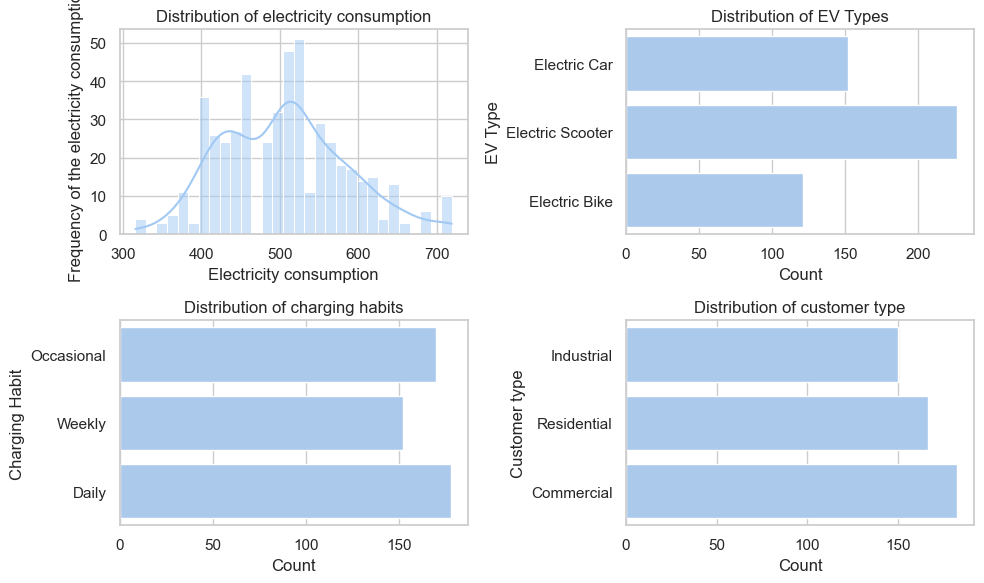

In [8]:
# Set the style and colour palette of the plot
sns.set(style = "whitegrid")
sns.set_palette("pastel")

#Create a 2x2 subplot grid
fig, axes = plt.subplots(2,2, figsize = (10, 6))

#plot distribution of the electricity consumption
sns.histplot(data=Distribution_data, x = 'Electricity_Consumption (kWh)', bins =30, kde = True, ax = axes[0,0]) 
axes[0,0].set_title("Distribution of electricity consumption")
axes[0,0].set_xlabel("Electricity consumption")
axes[0,0].set_ylabel("Frequency of the electricity consumption")

#Plot the distribution of EV types
sns.countplot(data=Distribution_data, y = 'EV_Type', ax = axes[0,1]) 
axes[0,1].set_title("Distribution of EV Types")
axes[0,1].set_xlabel("Count")
axes[0,1].set_ylabel("EV Type")

#Plot the distribution of Charging habits
sns.countplot(data=Distribution_data, y = 'Charging_Habit', ax = axes[1,0]) 
axes[1,0].set_title("Distribution of charging habits")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Charging Habit")

#Plot the customer type
sns.countplot(data=Distribution_data, y = 'Customer_Type', ax = axes[1,1]) 
axes[1,1].set_title("Distribution of customer type")
axes[1,1].set_xlabel("Count")
axes[1,1].set_ylabel("Customer type")

#Adjust layout
plt.tight_layout()

#Show the plots
plt.show

## Bivariate analysis

In [9]:
# Extract lat and long for ev charging stations
Distribution_data['ev_latitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
lambda x:float(x.split(",")[0].replace("(","").strip()))
Distribution_data['ev_longitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
lambda x:float(x.split(",")[1].replace(")","").strip()))

# Extract lat and long for ev substation stations
Geospatial_data['substation_latitude'] = Geospatial_data['Substation_Location'].apply(
lambda x:float(x.split(",")[0].replace("(","").strip()))
Geospatial_data['substation_longitude'] = Geospatial_data['Substation_Location'].apply(
lambda x:float(x.split(",")[1].replace(")","").strip()))

#drop the original location columns to clean up the dataframe
Distribution_data = Distribution_data.drop(columns=['EV_Charging_Station_Location'])
Geospatial_data = Geospatial_data.drop(columns=['Substation_Location'])

In [10]:
#display the results
Geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [11]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


C:\Users\USER\AppData\Local\Temp\ipykernel_10964\2154052290.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


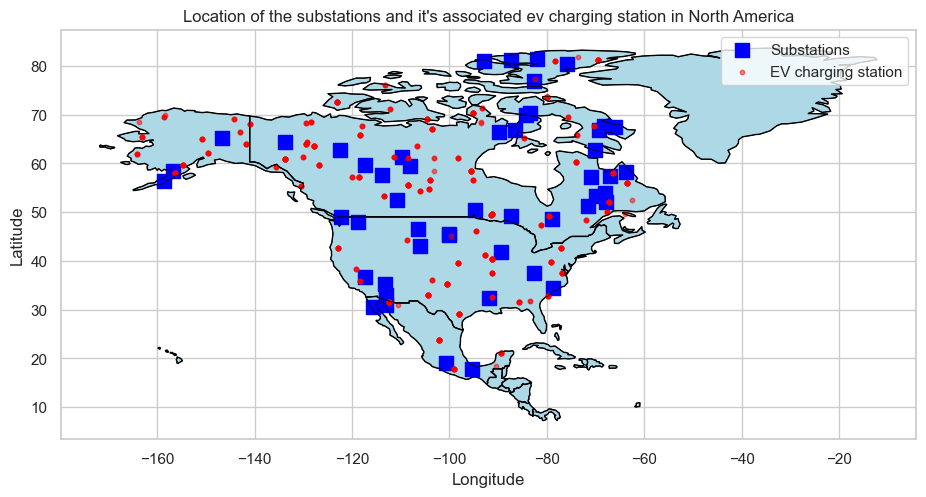

In [12]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_data, 
                          geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
                          
substation_gdf = gpd.GeoDataFrame(Geospatial_data, 
                          geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (10,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker = 's', markersize = 100, color ='blue', label='Substations')

#Plot the ev charging stations on the map
#plotting the substations on the map
ev_gdf.plot(ax=ax, markersize = 10, color ='red', label='EV charging station', alpha =0.5)

#set title and axis labels
plt.title("Location of the substations and it's associated ev charging station in North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10964\3737862746.py:17: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


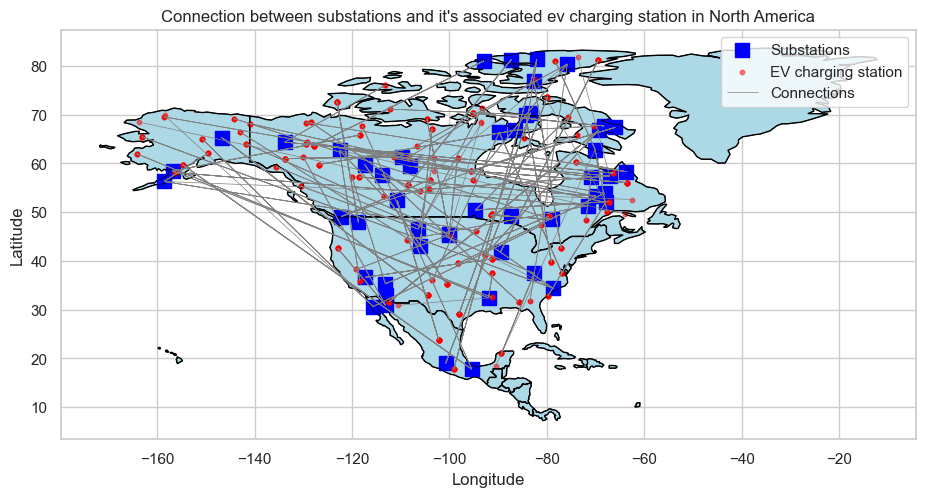

In [13]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_data, 
                          geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
                          
substation_gdf = gpd.GeoDataFrame(Geospatial_data, 
                          geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))
# create lines connecting each substation to the associated ev charging station
lines = []
for _, ev_row in Distribution_data.iterrows():
    substations = Geospatial_data[Geospatial_data['Substation_ID'] ==ev_row['Substation_ID']].iloc[0]
    line = [(ev_row['ev_longitude'], ev_row['ev_latitude']),
           (substations['substation_longitude'], substations['substation_latitude'])]
    lines.append(line)
line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (10,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker = 's', markersize = 100, color ='blue', label='Substations')

#Plot the ev charging stations on the map
ev_gdf.plot(ax=ax, markersize = 10, color ='red', label='EV charging station', alpha =0.5)

#plotting line
line_gdf.plot(ax=ax, linewidth=0.5, color = 'gray', label ="Connections")

#set title and axis labels
plt.title("Connection between substations and it's associated ev charging station in North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10964\3508077049.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


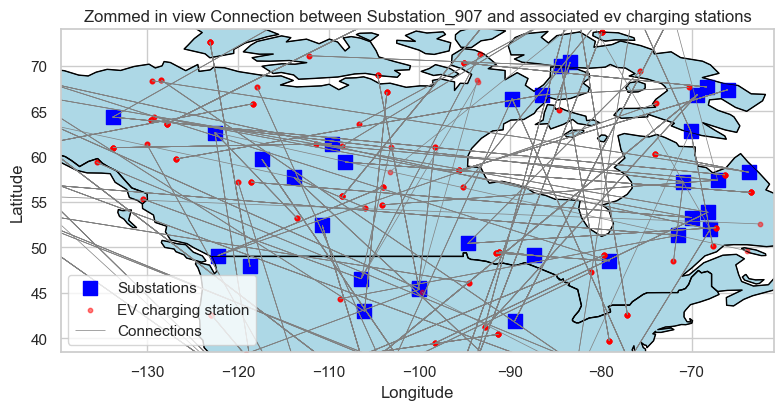

In [14]:
# Zoom in and see the connection of substation 1 to EV charging stations
# Filter to the first substation
selected_substation = Geospatial_data.iloc[0]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

#Convert to Geodataframe
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, 
                                   geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), 
                                   geometry=gpd.points_from_xy([selected_substation.substation_longitude], 
                                                              selected_substation.substation_latitude))
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'],
                   selected_substation['substation_longitude'],
                   selected_substation['substation_latitude'])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]),(line[2], line[3])]) for line in lines_selected])


#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx-buffer, maxx+buffer]
ylim = [miny-buffer, maxy+buffer]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (8,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker = 's', markersize = 100, color ='blue', label='Substations')

#Plot the ev charging stations on the map
ev_gdf.plot(ax=ax, markersize = 10, color ='red', label='EV charging station', alpha =0.5)

#plotting line
line_gdf.plot(ax=ax, linewidth=0.5, color = 'gray', label ="Connections")

#Setting the zoom in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#set title and axis labels
plt.title(f'Zommed in view Connection between {selected_substation['Substation_ID']} and associated ev charging stations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10964\1554326091.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


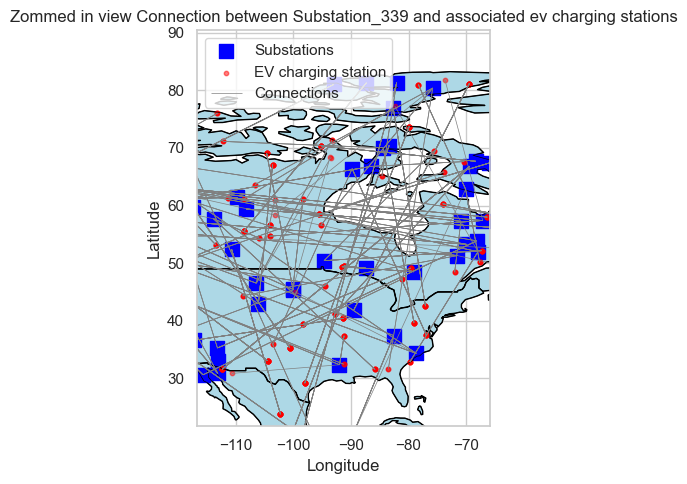

In [15]:
# Zoom in and see the connection of substation 1 to EV charging stations
# Filter to the first substation
selected_substation = Geospatial_data.iloc[2]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

#Convert to Geodataframe
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, 
                                   geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), 
                                   geometry=gpd.points_from_xy([selected_substation.substation_longitude], 
                                                              selected_substation.substation_latitude))
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'],
                   selected_substation['substation_longitude'],
                   selected_substation['substation_latitude'])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]),(line[2], line[3])]) for line in lines_selected])


#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx-buffer, maxx+buffer]
ylim = [miny-buffer, maxy+buffer]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (8,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker = 's', markersize = 100, color ='blue', label='Substations')

#Plot the ev charging stations on the map
ev_gdf.plot(ax=ax, markersize = 10, color ='red', label='EV charging station', alpha =0.5)

#plotting line
line_gdf.plot(ax=ax, linewidth=0.5, color = 'gray', label ="Connections")

#Setting the zoom in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#set title and axis labels
plt.title(f'Zommed in view Connection between {selected_substation['Substation_ID']} and associated ev charging stations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10964\3148605374.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


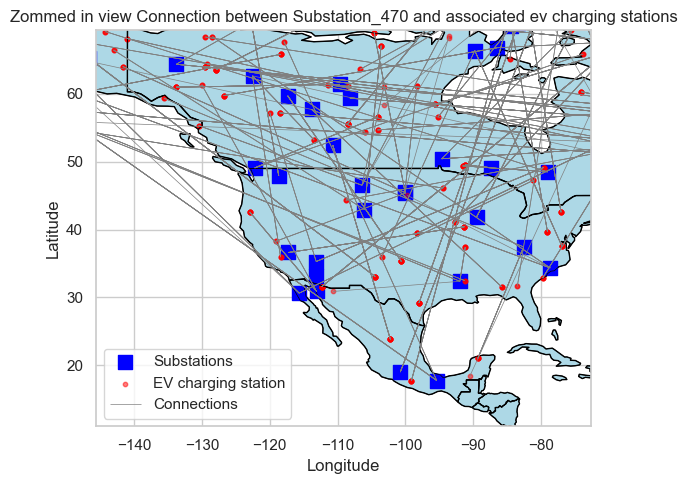

In [16]:
# Zoom in and see the connection of substation 1 to EV charging stations
# Filter to the first substation
selected_substation = Geospatial_data.iloc[49]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

#Convert to Geodataframe
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, 
                                   geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(selected_substation.to_frame().transpose(), 
                                   geometry=gpd.points_from_xy([selected_substation.substation_longitude], 
                                                              selected_substation.substation_latitude))
lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'],
                   selected_substation['substation_longitude'],
                   selected_substation['substation_latitude'])
                  for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]),(line[2], line[3])]) for line in lines_selected])


#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx-buffer, maxx+buffer]
ylim = [miny-buffer, maxy+buffer]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (8,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#plotting the substations on the map
substation_gdf.plot(ax=ax, marker = 's', markersize = 100, color ='blue', label='Substations')

#Plot the ev charging stations on the map
ev_gdf.plot(ax=ax, markersize = 10, color ='red', label='EV charging station', alpha =0.5)

#plotting line
line_gdf.plot(ax=ax, linewidth=0.5, color = 'gray', label ="Connections")

#Setting the zoom in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#set title and axis labels
plt.title(f'Zommed in view Connection between {selected_substation['Substation_ID']} and associated ev charging stations')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10964\3180990824.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


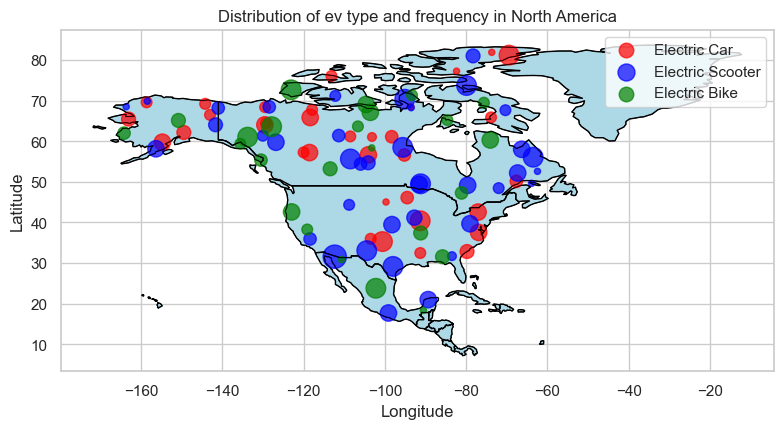

In [32]:
# group by the location and the ev type then count the number of substations

grouped_data = Distribution_data.groupby(['ev_latitude', 'ev_longitude', 'EV_Type']).size().reset_index(name='count')

#convert to geodataframe
grouped_gdf = gpd.GeoDataFrame(grouped_data, geometry = gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

#Load the world map data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#filter the map to North America
north_america = world[world['continent'] =="North America"]

#plotting the map for north america
fig, ax = plt.subplots(figsize = (8,5))
north_america.boundary.plot(ax=ax, linewidth = 0.5, color = 'black')
north_america.plot(ax=ax, color = 'lightblue', edgecolor = 'black')

#Define the colours of ev type
colors = {'Electric Car': 'red', 'Electric Scooter':'blue', 'Electric Bike':'green'}
#plot ev types
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize=  sub_gdf['count']*20, color = color, label =ev_type, alpha =0.7)

#set title and axis labels
plt.title("Distribution of ev type and frequency in North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.tight_layout()
plt.show()

## Network capacity assessment

In [44]:
#Group the ev distribution data by substation and calculate a total electricity consumption for each substation

total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

#merging the total consumption data with geospatial data
network_capacity_data = pd.merge(Geospatial_data, total_consumption_per_substation, on ='Substation_ID')

#Rename the columns for better understanding
network_capacity_data.rename(columns ={'Electricity_Consumption (kWh)':'Total_Consumption (kwh)'}, inplace=True)

#Calculating the ratio of total consumption of transmission line capacity
#Conversion: 1MW = 1000kwh
network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kwh)']/(network_capacity_data['Transmission_Line_Capacity (MW)'] * 1000)



In [45]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,0.166594
1,Substation_218,71,70.025385,-84.380572,5997.437051,0.084471
2,Substation_339,85,80.393235,-75.797841,4536.778685,0.053374
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
4,Substation_349,40,66.798871,-86.511241,4901.836555,0.122546


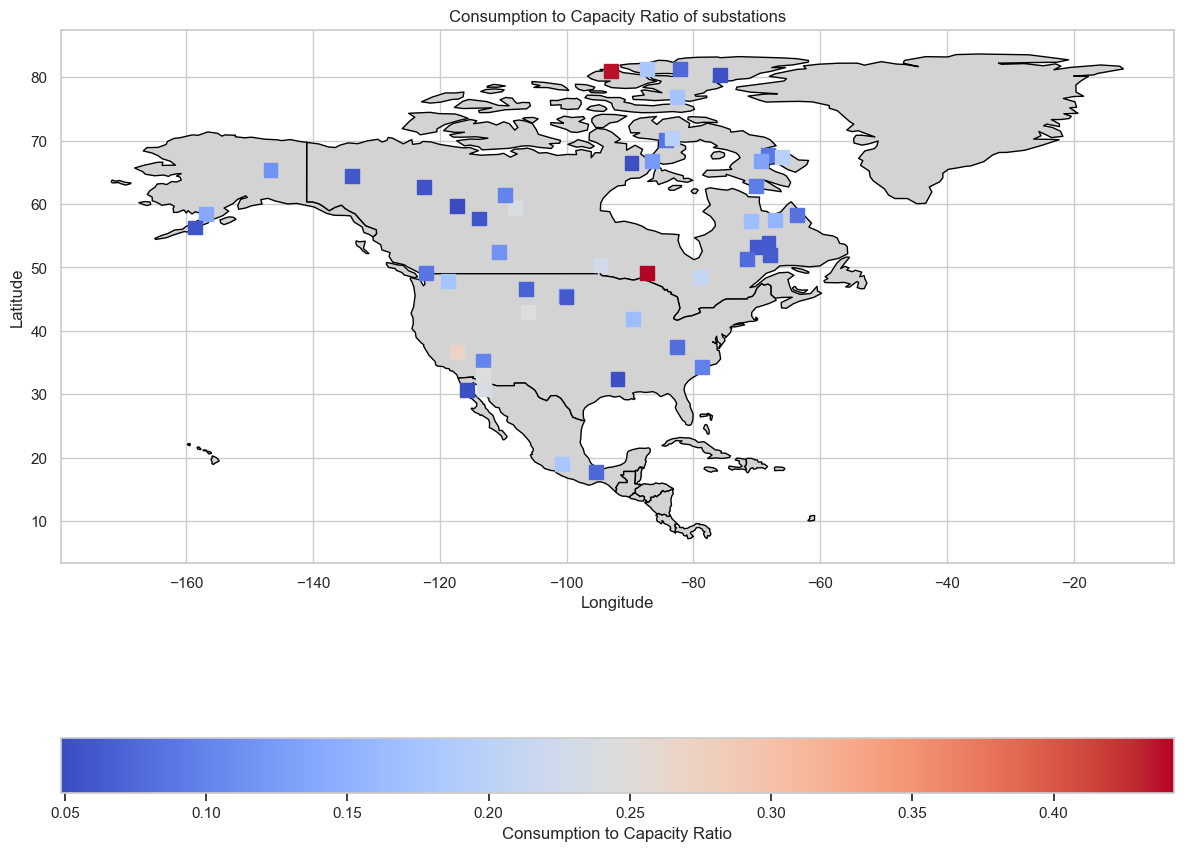

In [62]:
#Create a geodataframe for the network capacity dataframe
geometry_network_capacity = [Point(lon,lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity =gpd.GeoDataFrame(network_capacity_data, geometry = geometry_network_capacity)
                          
#plotting in choropleth style
fig, ax = plt.subplots(figsize=(12,12))
north_america.plot(ax=ax, color='lightgray', edgecolor = 'black')
gdf_network_capacity.plot(column = 'Consumption_to_Capacity_Ratio', cmap='coolwarm', legend = True,
                         marker = 's', markersize = 100, ax=ax, legend_kwds = {'label': "Consumption to Capacity Ratio", 'orientation':"horizontal"})
ax.set_title("Consumption to Capacity Ratio of substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

In [67]:
#group by the substation_id for the number of evs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()
#merge network capacity data with ev counts
final_data = pd.merge(ev_counts, network_capacity_data, on ='Substation_ID')

#correlation
correlation_ratio = final_data['Number_of_EVs'].corr(final_date['Consumption_to_Capacity_Ratio'])


In [68]:
correlation_ratio

-0.10944923035990646

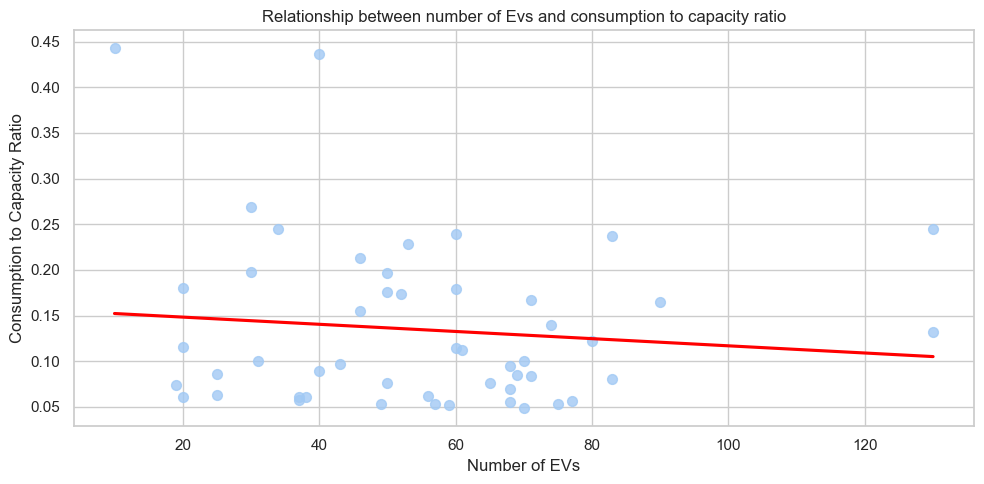

In [70]:
#scatter plot with regression line
plt.figure(figsize=(10,5))
sns.regplot(x='Number_of_EVs', y='Consumption_to_Capacity_Ratio', data=final_data, scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.title("Relationship between number of Evs and consumption to capacity ratio")
plt.xlabel("Number of EVs")
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identifying bottlenecks

Filter out where the electricity consumption is high

In [71]:
#Filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>0.9]


In [72]:
#displaying data
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio


## Optimizing network upgrade

In [73]:
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kwh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,0.442634
14,Substation_87,12,81.031814,-92.941747,5243.800714,0.436983
26,Substation_711,17,36.618181,-117.277556,4579.354677,0.269374
46,Substation_11,43,33.082269,-113.118931,10534.827701,0.244996
41,Substation_258,22,42.952789,-106.049333,5378.214378,0.244464


## Correlation with weather data

In [81]:
#merge weather data with distribution data
merged_data = pd.merge(Distribution_data, Weather_data, on = ('Timestamp', 'Substation_ID'))

#Calculate the correlation between weather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

#display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


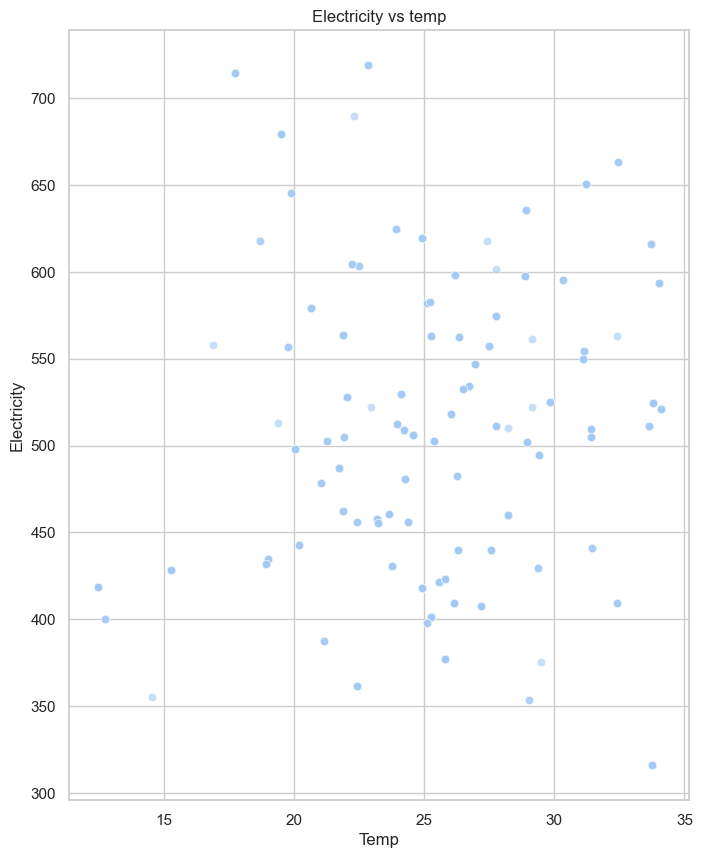

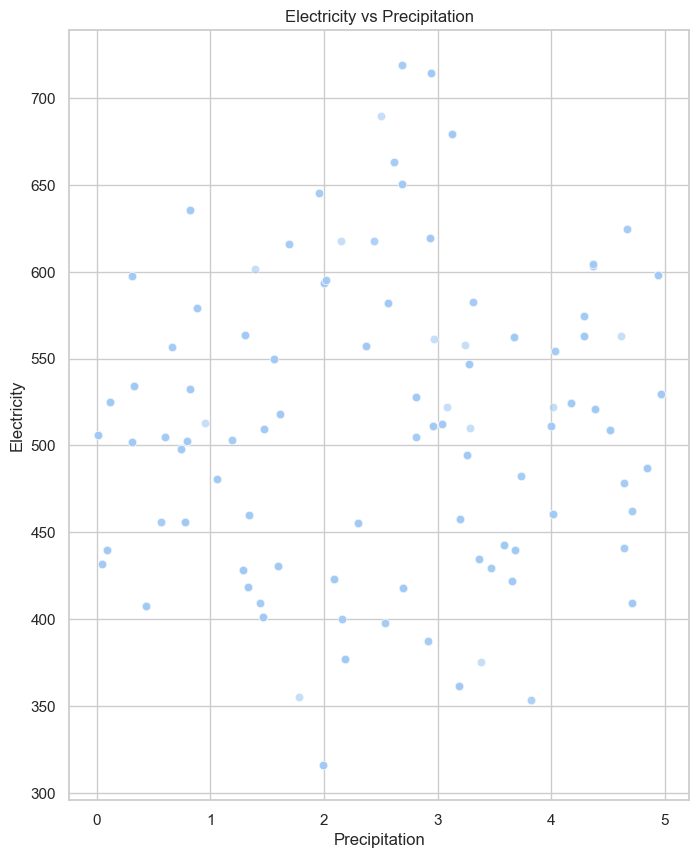

In [84]:
#Electricity consumption vs temp
plt.figure(figsize=(8,10))
sns.scatterplot(data=merged_data, x = 'Temperature (°C)', y = 'Electricity_Consumption (kWh)', alpha = 0.6)
plt.title("Electricity vs temp")
plt.xlabel('Temp')
plt.ylabel("Electricity")
plt.show()

#Electricity consumption vs precipitation
plt.figure(figsize=(8,10))
sns.scatterplot(data=merged_data, x = 'Precipitation (mm)', y = 'Electricity_Consumption (kWh)', alpha = 0.6)
plt.title("Electricity vs Precipitation")
plt.xlabel('Precipitation')
plt.ylabel("Electricity")
plt.show()